### Introduction to Multiple Linear Regression 
- Data preparation (Feature Selection with reducing dimensions)
- Implement and predict the model 
- Model Evaluation

In [2]:
#Import libraries 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Data Collection 
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

df = pd.read_csv(url)

In [4]:
#Taking Ramdom sample to see sample from population
df.sample(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
70,2014,BENTLEY,CONTINENTAL GT CONVERTIBLE,SUBCOMPACT,4.0,8,AS8,Z,16.8,10.3,13.9,20,320
65,2014,AUDI,TT ROADSTER QUATTRO,TWO-SEATER,2.0,4,A6,Z,10.4,7.6,9.1,31,209
372,2014,FORD,F150 4X4,PICKUP TRUCK - STANDARD,3.5,6,A6,X,15.9,11.3,13.8,20,317
856,2014,NISSAN,ROGUE AWD,SUV - SMALL,2.5,4,AV,X,9.5,7.4,8.6,33,198
979,2014,TOYOTA,COROLLA MATRIX,STATION WAGON - SMALL,1.8,4,M5,X,8.9,7.3,8.2,34,189
448,2014,GMC,SAVANA 2500 PASSENGER,VAN - PASSENGER,6.0,8,A6,X,21.9,15.0,18.8,15,432
655,2014,LEXUS,CT 200h,COMPACT,1.8,4,AV,X,5.5,5.8,5.6,50,129
664,2014,LEXUS,IS 250 C,SUBCOMPACT,2.5,6,AS6,Z,11.2,7.8,9.7,29,223
325,2014,DODGE,DURANGO AWD FFV,SUV - STANDARD,3.6,6,A8,E,17.7,13.0,15.6,18,250
413,2014,FORD,FUSION (Start/Stop),MID-SIZE,1.5,4,AS6,X,9.5,6.3,8.1,35,186


In [5]:
#Describe the dataset to have better view in feature selection
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
#Dropping columns which are not suitable for model prediction
df = df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE',], axis=1)

- After dropping features which are not suitable to predict the model 
- we can check create a co - relation matrix between independent variable (explonatory variables)
- Explainatory variable shoule not be in corelation with each other 

In [7]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


### Analysis of the co-relation matrix 
- CO2Emission: - It's the target (study variable).
- Explainatory Variable: - 
    - Cylinders is highly corelated with EngineSize (So we can drop `CYLINDERS`)
    - `FUELCONSUMPTION_CITY` & `FUELCONSUMPTION_HWY` are corelated with `FUELCONSUMPTION_COMB`. So we can drop these features as well 
    - `FUELCONSUMPTION_COMB` & `FUELCONSUMPTION_COMB_MPG` are not corelated but they should be, so we can drop ('FUELCONSUMPTION_COMB')

- **Drop features**: - `CYLINDERS`, `FUELCONSUMPTION_CITY`, `FUELCONSUMPTION_HWY` & `FUELCONSUMPTION_COMB`


In [8]:
#Drop feature: - `CYLINDERS`, `FUELCONSUMPTION_CITY`, `FUELCONSUMPTION_HWY` & `FUELCONSUMPTION_COMB`
df = df.drop(['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB'], axis=1)

In [9]:
df.head(10)

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244
5,3.5,28,230
6,3.5,28,232
7,3.7,25,255
8,3.7,24,267
9,2.4,31,212


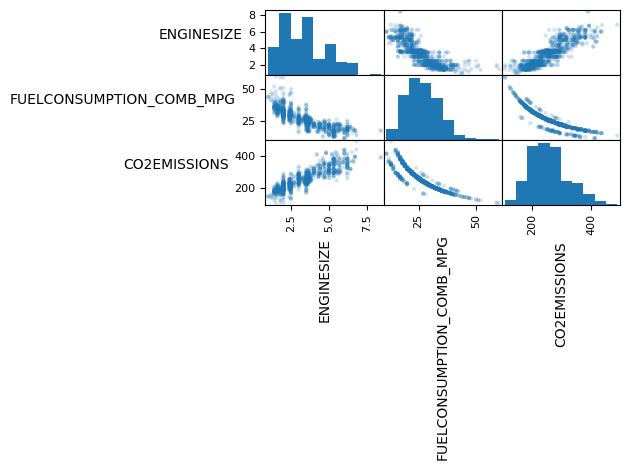

In [10]:
#Visualize dataframes in scatter plot
axes = pd.plotting.scatter_matrix(df, alpha= 0.2)

#To avoid overlapping of label & have a better view of the graph
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90) #Rotate x axis by vertical (90 degree)
    ax.yaxis.label.set_rotation(0)  #Set y axis a horizontal (0 degress)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace= 0, hspace= 0)
plt.show()

In [11]:
#Convert Features selected to list of independent and dependent variables 
#Independent variables 
x = df.iloc[:,[0, 1]].to_numpy()

#Dependent variables
y = df.iloc[:,[2]].to_numpy()
print(y)

[[196]
 [221]
 [136]
 ...
 [271]
 [260]
 [294]]


### Preprocess Selected Features 
- Standarization of features of independent variable to make them compariable 
- Making standard and normalize independent variable features to better predict the model 
- *Types of Pre-process selected features*
    - **Standard Feature**: - $xbar_i = x_i - Ū_i / σ_i$
    - **Normalization Feature**: - $xbar_i = x_i - min(x_i) / max(x_i) - min(x_i)$
    - **One-Hot Encoding**
    - **Log/Power Transformation**

- If this feature is applied in multiple regression then, it's easy to converge on minima using gradient descent method. 

In [12]:
#Preprocess Selected features (using standard feature)
from sklearn import preprocessing

std_features = preprocessing.StandardScaler()

#Now standarizing independent variables (explaintory variables)
x_standard = std_features.fit_transform(x)

In [13]:
#convert it to dataframe to just see the features after this process 
pd.DataFrame(x_standard).describe().round(2)

,0,1
count,1067.00,1067.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.66,-2.07
25%,-0.95,-0.73
50%,0.04,-0.06
75%,0.67,0.61
max,3.57,4.50


In [19]:
#Divide the dataset in test and training samples 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_standard, y, test_size= 0.2, random_state= 42)

print(x_train.size, y_train.size)

1706 853


In [20]:
#Developing a linear regression model on trainig dataset 
from sklearn import linear_model

regressor = linear_model.LinearRegression()

regressor.fit(x_train, y_train)

print("Slope: ", regressor.coef_[0])
print("Intercept: ", regressor.intercept_)

Slope:  [ 25.27339614 -37.4381472 ]
Intercept:  [256.29072488]


In [28]:
#Un-standarized independent variables to get original slope & interpect 
mean = std_features.mean_
stand_deviation = np.sqrt(std_features.var_)

slope_original = regressor.coef_ / stand_deviation

intercept_original = regressor.intercept_ - np.sum(mean * regressor.coef_ / stand_deviation)

print(slope_original, intercept_original)

[[17.8581369  -5.01502179]] [329.1363967]


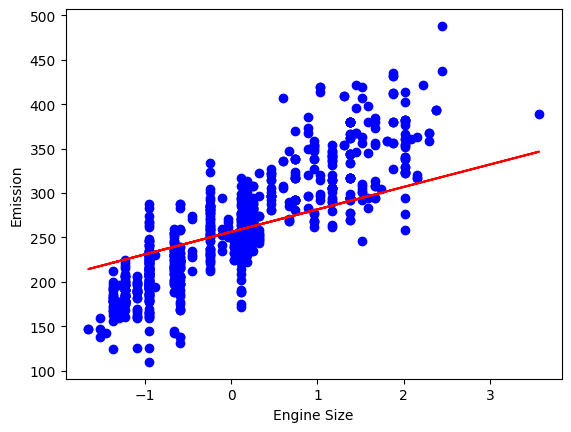

In [38]:
#Visualization of the model fit
import numpy as np
import matplotlib.pyplot as plt

#Visualization of Engine Size with Emission 
plt.scatter(x_train[:, 0], y_train, color='blue')
plt.plot(x_train[:, 0], regressor.intercept_[0] + x_train[:, 0] * regressor.coef_[0, 0], '-r')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()


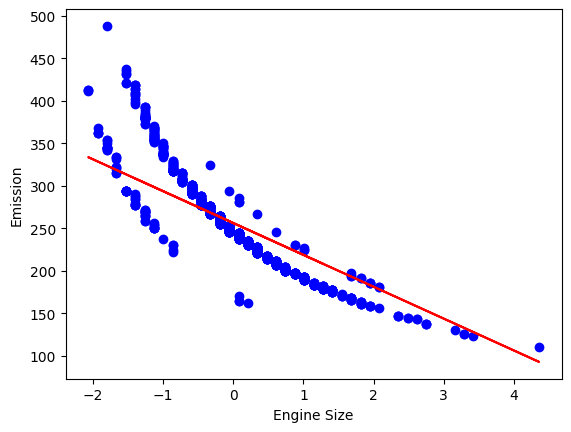

In [39]:
#Visualization of Fuel Comsumption with Emission 
plt.scatter(x_train[:, 1], y_train, color='blue')
plt.plot(x_train[:, 1], regressor.intercept_[0] + x_train[:, 1] * regressor.coef_[0, 1], '-r')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

<class 'tuple'>


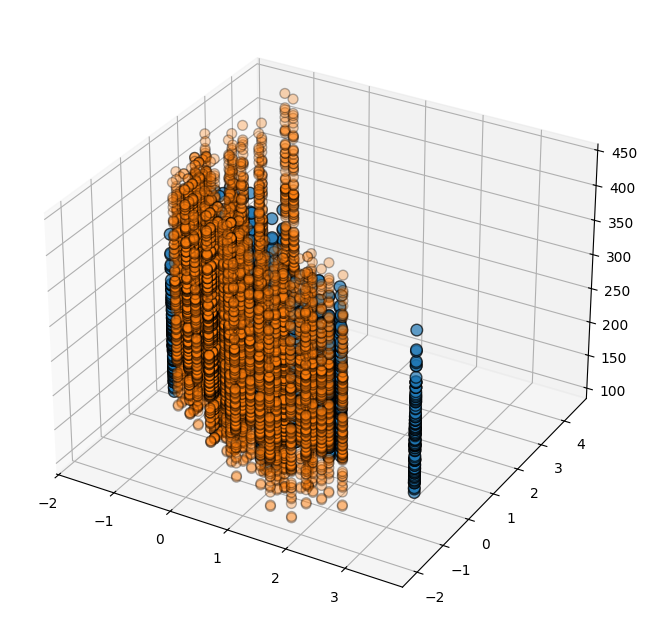

In [59]:
#Visualization of the model fit on training vs testing datasets (3D Modeling)
import numpy as np
import matplotlib.pyplot as plt

x_1 = x_test[:, 0] if x_test.ndim > 1 else x_test
x_2 = x_test[:, 1] if x_test.ndim > 1 else np.zeros_like(x_1)

#Creating a meshgrid surface for the regression plan  
x1_surf, x2_surf = np.meshgrid(np.linspace(min(x_1), max(x_1), 100), 
                               np.linspace(min(x_2), max(x_2), 100))

#y = mx + c
y_surf = regressor.intercept_[0] + x1_surf * regressor.coef_[0, 0], x2_surf * regressor.coef_[0, 1]

#Predict the model output from test dataset and compare it with y_test (output)
#As sklearn library can only predict, fit models when sample size is x(samples, features) and not x(samples, )
#Due to this we need to reshape x as x(n_samples, 1)
y_predict = regressor.predict(x_test.reshape(-1, 1)) if x_test.ndim == 1 else regressor.predict(x_test)

#Predict values above & below imaginary plane (returns boolean)
plane_above = (y_predict >= y_test)
plane_below = (y_predict <= y_test)

plane_above = plane_above[:, 0]
plane_below = plane_below[:, 0]

#Plotting the 3D graph
#Defining fixure fixed size 
fig = plt.figure(figsize=(20, 8)) # X-Axis = 20 dim, Y-Axis = 8 dim
ax = fig.add_subplot(111, projection='3d')

#Plot datapoint in the plane 
#Plane above
ax.scatter(x_1[plane_above], x_2[plane_above], y_test[plane_above], label= "Plane Above", s= 70, alpha= 0.7, ec= 'k')

#Plane below
ax.scatter(x_1[plane_below], x_2[plane_below], y_test[plane_below], label= "Plane Below", s= 50, alpha= 0.3, ec= 'k')

print(type(y_surf))


### TODO: - 
- Model evaluation
- Model tradeoff's and limitations